In [1]:
# -*- coding: utf-8 -*- Line 2
#----------------------------------------------------------------------------
# Project     : Price Alarm System Enhancement - Alarm3 - Abnormal Price Detection
# Created By  : Eungi Cho
# Created Date: 07/06/22
# Updated Date: 14/06/22
# version ='1.0'
# ---------------------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm


warnings.filterwarnings("ignore")
tqdm.pandas()

plt.style.use('default')

In [2]:
import pathlib
df_raw = pd.read_csv('/Users/cho-eungi/Practice/CSV/market_entry_price.csv')
df_raw = df_raw.drop_duplicates()
df_raw.head()

,source_id,country,market_id,product_id,entry_id,currency,final_unit,date,price_min,price_max,price_avg
0,16,China,2344,125,118227410,CNY,kg,2022-02-21,8.16,8.34,8.205000
1,16,China,2344,125,118227410,CNY,kg,2022-05-23,6.02,6.30,6.146667
2,16,China,2344,125,118227410,CNY,kg,2022-04-04,6.67,7.04,6.901667
3,16,China,2344,125,118227410,CNY,kg,2022-05-09,5.93,6.30,6.098000
4,16,China,2344,125,118227410,CNY,kg,2022-05-16,6.02,6.12,6.070000


In [22]:
entry_lst = np.sort(df_raw['entry_id'].unique())
np.random.seed(0)
sample_entry = np.random.choice(entry_lst, 2)
sample_entry = [92950916, 94884258, 83530991, 50895935]

# test_df = sample_entry dataframe - before time_df join
test_df = df_raw.loc[df_raw['entry_id'].isin(sample_entry)].sort_values(
    by = ['source_id', 'market_id', 'entry_id', 'date']).copy()
test_df['date'] = pd.to_datetime(test_df['date'])
test_df

,source_id,country,market_id,product_id,entry_id,currency,final_unit,date,price_min,price_max,price_avg
9288535,39,India,2647,259,83530991,INR,kg,2020-08-03,14.50,15.75,15.250000
9644375,39,India,2647,259,83530991,INR,kg,2020-08-10,14.00,15.00,14.500000
9357771,39,India,2647,259,83530991,INR,kg,2020-08-17,13.50,14.75,14.150000
9569610,39,India,2647,259,83530991,INR,kg,2020-08-24,14.25,16.00,15.250000
9536863,39,India,2647,259,83530991,INR,kg,2020-08-31,15.00,17.00,15.800000
...,...,...,...,...,...,...,...,...,...,...,...
5242590,647,South Africa,1381,260,94884258,ZAR,kg,2021-02-01,4.00,5.00,4.625000
5096613,647,South Africa,1381,260,94884258,ZAR,kg,2021-02-08,1.00,3.00,2.000000
5108775,647,South Africa,1381,260,94884258,ZAR,kg,2021-02-15,4.00,3.40,1.000000
5355565,647,South Africa,1381,260,94884258,ZAR,kg,2022-02-07,5.00,12.00,8.010000


In [29]:
# W-MON date range from 2020 to 2022
# Left Join Test DF and Time DF
empty_df = pd.DataFrame()
for entry in tqdm(sample_entry):
    entry_start = min(df_raw.loc[df_raw['entry_id'] == entry]['date'])
    date_range = pd.date_range(entry_start, '2022-06-06', freq = 'W-MON')
    time_df = pd.DataFrame({'date': date_range})
    
    time_df['entry_id_'] = entry
    entry_df = test_df.loc[test_df['entry_id'] == entry]
    joined_df = pd.merge(time_df, entry_df, left_on = ['date'], right_on = ['date'], how = 'left')
    empty_df = empty_df.append(joined_df)

empty_df = empty_df.drop(['entry_id'], axis = 1)
df = empty_df.copy()
df = df.sort_values(by = ['entry_id_', 'date'])
df.set_index(np.arange(len(df)), inplace=True)
df

100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00, 26.50it/s]


,date,entry_id_,source_id,country,market_id,product_id,currency,final_unit,price_min,price_max,price_avg
0,2020-03-09,50895935,270.0,India,1345.0,239.0,INR,kg,5010.0,5193.0,5132.000000
1,2020-03-16,50895935,270.0,India,1345.0,239.0,INR,kg,5158.0,5158.0,5158.000000
2,2020-03-23,50895935,270.0,India,1345.0,239.0,INR,kg,5340.0,9165.0,6670.000000
3,2020-03-30,50895935,270.0,India,1345.0,239.0,INR,kg,8310.0,11470.0,9578.571429
4,2020-04-06,50895935,270.0,India,1345.0,239.0,INR,kg,7732.0,8420.0,8070.666667
...,...,...,...,...,...,...,...,...,...,...,...
403,2022-05-09,94884258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404,2022-05-16,94884258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
405,2022-05-23,94884258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,2022-05-30,94884258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


number of unique entry_id in df:  4
shape of df:  (408, 11)
number of null price_avg data in each entry: 


100%|█████████████████████████████████████████████████| 4/4 [00:00<00:00, 1664.57it/s]


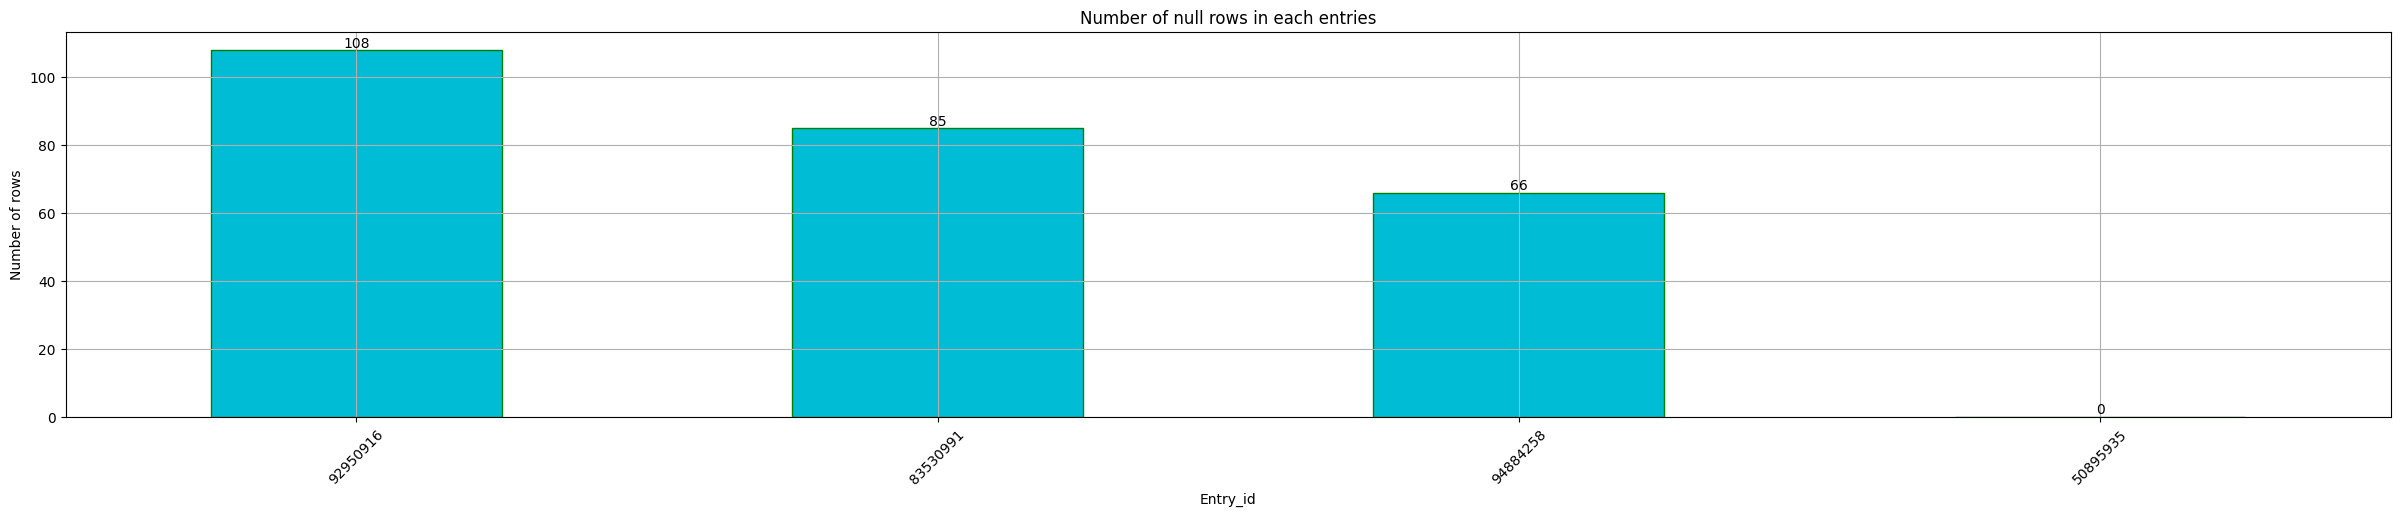

In [30]:
# Initialize a stats dataframe
df_stats = df[['date', 'entry_id_', 'product_id', 'price_avg']]

# Count null rows in each entry
def groupby_count_null(row):
    null_cnt = row.isnull().astype(int).sum()
    return null_cnt

print('number of unique entry_id in df: ', len(df.entry_id_.unique()))
print('shape of df: ', df.shape)
print('number of null price_avg data in each entry: ')

null_cnt_by_entry = df.groupby('entry_id_')['price_avg'].progress_apply(groupby_count_null).sort_values(ascending = False)
# ax = null_cnt_by_entry.plot.hist(
#     figsize=(30, 5), bins = 60, title='Number of null rows in each entries', 
#     fontsize=10, color='#00bcd4', edgecolor='g', linestyle='-', grid=True
# )

ax = null_cnt_by_entry.plot.bar(
    rot = 45, figsize=(30, 5), title='Number of null rows in each entries', 
    fontsize=10, color='#00bcd4', edgecolor='g', linestyle='-', 
    legend=False, grid=True, xlabel='Entry_id', ylabel='Number of rows'
)
ax.bar_label(ax.containers[0])
plt.style.use('default')
plt.show()

In [31]:
# Count the number of outliers
def outlier_func(row, sigma=2, window = 4, display_plot = False, used_in_groupby = False):
    row = pd.DataFrame(row)
    Z_row = (row - row.mean()) / row.std()
    
    # Use moving average by rolling
    average = row.rolling(window = window, min_periods = 1).mean()
    # Standardization of average
    Z_average = (average - average.mean()) / average.std()
    
    outlier_lst = []
    standardized_outlier_lst = []
    x_idx_lst = []
    
    for i in range(len(Z_row)):
        if  Z_row.iat[i, 0] > Z_average.iat[i, 0] + sigma or Z_row.iat[i, 0] < Z_average.iat[i, 0] - sigma:
            x_idx_lst.append(i)
            outlier_lst.append(row.iat[i, 0])
            standardized_outlier_lst.append(Z_row.iat[i, 0])

    if display_plot is True:
        plt.figure(figsize=(30, 6), dpi=80)

        plt.plot(Z_row, marker = 'o')
        plt.plot(Z_average)
        plt.plot(Z_average - sigma, '--', color='#ff0000')
        plt.plot(Z_average + sigma, '--', color='#ff0000')
        plt.plot(x_idx_lst, standardized_outlier_lst, 'o'
                , markersize = 12, markerfacecolor = 'None', markeredgecolor = 'red', markeredgewidth = 2)
        plt.xlabel('Time (weeks)')
        plt.ylabel('Standardized Price')
        plt.title(f'Outlier detection (sigma= {sigma}), (window = {window})')
        plt.legend(['Price', 'Moving average', 'Lower bound', 'Upper bound', 'Alarm2'])

        plt.show()
    
    if used_in_groupby is True:
        return len(outlier_lst)
    else:
        return x_idx_lst, outlier_lst

In [32]:
def calculate_volatility(row):
    notnull_row = row.values[~np.isnan(row.values)]
    if len(notnull_row) > 0.5 * len(row):
        chg_rate_lst = [(notnull_row[i] - notnull_row[i-1]) * 100 / notnull_row[i-1] for i in range(1, len(notnull_row))]
        volatility = np.mean(chg_rate_lst)
    else:
        volatility = np.nan
    return volatility

volatility_series = df.groupby('entry_id_')['price_avg'].apply(lambda row: calculate_volatility(row))
print(volatility_series.sort_values(ascending=False)[:10])
print(volatility_series[volatility_series.values == volatility_series.max()])

entry_id_
50895935   -0.290709
83530991         NaN
92950916         NaN
94884258         NaN
Name: price_avg, dtype: float64
entry_id_
50895935   -0.290709
Name: price_avg, dtype: float64


In [33]:
# Pivot_table
df_pivot = df.pivot_table(['price_avg'], index = ['entry_id_'], columns = ['date'], dropna = False)
df_pivot.head()

price_avg                                                  \
date        2020-03-09 2020-03-16 2020-03-23   2020-03-30   2020-04-06   
entry_id_                                                                
50895935   5132.000000     5158.0     6670.0  9578.571429  8070.666667   
83530991           NaN        NaN        NaN          NaN          NaN   
92950916     48.666667       50.0        NaN          NaN          NaN   
94884258           NaN        NaN        NaN          NaN          NaN   

                                                                  ...  \
date      2020-04-13 2020-04-20 2020-04-27 2020-05-04 2020-05-11  ...   
entry_id_                                                         ...   
50895935     7521.73    7513.62     7292.8     6574.6     6926.0  ...   
83530991         NaN        NaN        NaN        NaN        NaN  ...   
92950916         NaN        NaN        NaN        NaN        NaN  ...   
94884258         NaN        NaN        NaN        NaN        NaN  ...   

                                                                               \
date      2022-04-04   2022-04-11 2022-04-18 2022-04-25 2022-05-02 2022-05-09   
entry_id_                                                                       
50895935      3387.4  2846.533333     3120.0     3070.0    3021.25     2974.0   
83530991         NaN          NaN        NaN        NaN        NaN        NaN   
92950916         NaN          NaN        NaN        NaN        NaN        NaN   
94884258         NaN          NaN        NaN        NaN        NaN        NaN   

                                                       
date      2022-05-16 2022-05-23 2022-05-30 2022-06-06  
entry_id_                                              
50895935      2915.6     3002.0     2887.0        2.0  
83530991         NaN        NaN        NaN        NaN  
92950916         NaN        NaN        NaN        NaN  
94884258         NaN        NaN        NaN        NaN  

[4 rows x 118 columns]

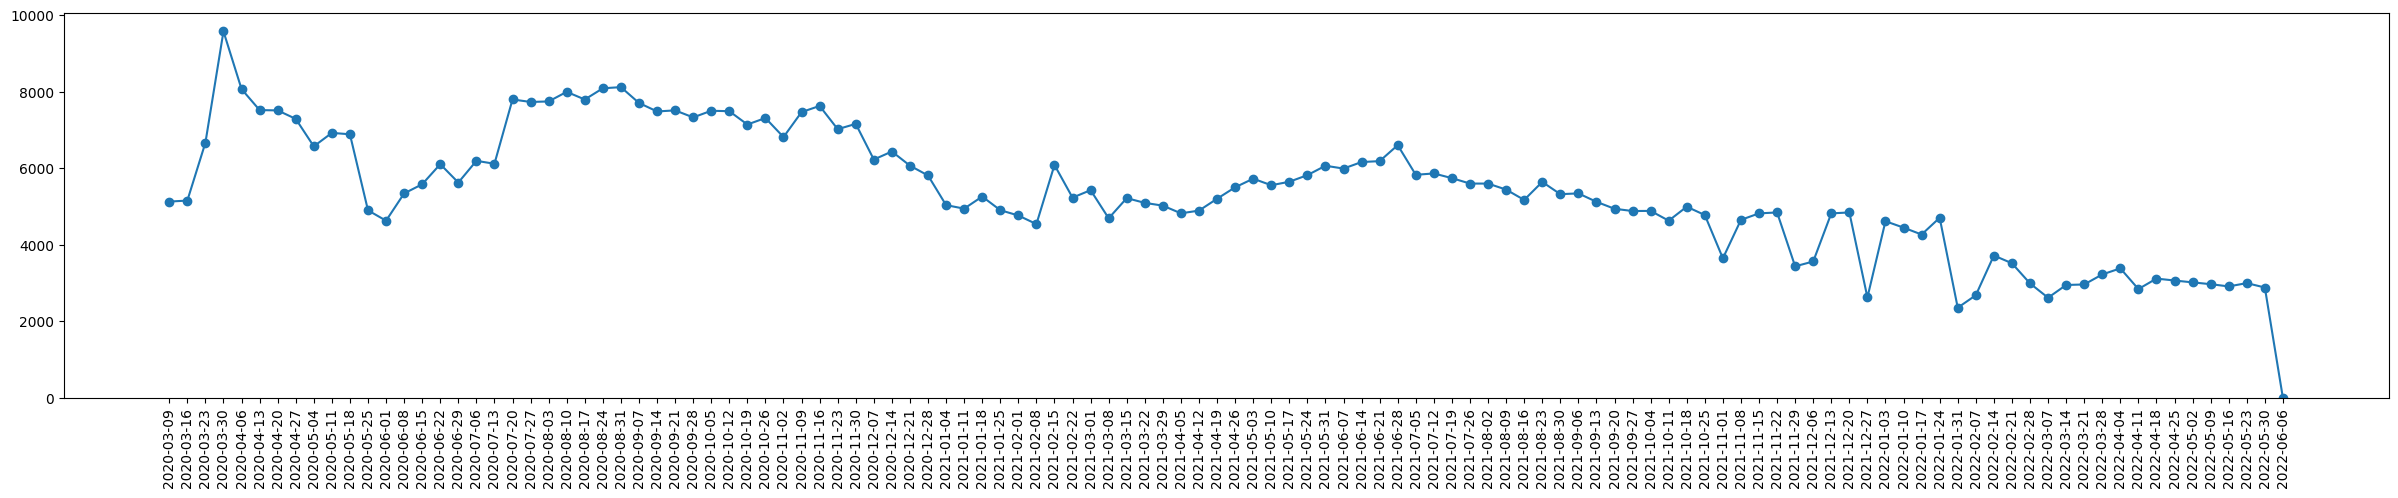

In [35]:
# Define function: Plot sample data with full time period
# entry = volatility_series.sort_values(ascending=False).index[0]
entry = 50895935
def plot_sample_with_ft(df_pivot, entry_id):
    # Masking null_value
    sample_entry = df_pivot[df_pivot.index == entry_id].stack(dropna = False).reset_index().drop(['entry_id_'], axis = 1)
    x = sample_entry.date
    y = sample_entry.price_avg.astype(np.double)
    ymask = np.isfinite(y)
    
    plt.figure(figsize = (30, 5))
    plt.plot(x[ymask], y[ymask], linestyle = '-', marker = 'o')
    plt.xticks(x, rotation = 90)
    plt.ylim(bottom = 0)
    
    # axvspan with red color - find index of start & end point of null
    sample_entry = sample_entry.set_index('date')
    is_nan = sample_entry['price_avg'].isna()
    n_groups = is_nan.ne(is_nan.shift()).cumsum()
    
    if len(sample_entry[is_nan].groupby(n_groups).groups) > 1:
        gap_list = sample_entry[is_nan].groupby(n_groups).aggregate(
            lambda x: (
                x.index[0] + pd.DateOffset(days=-7),
                x.index[-1] + pd.DateOffset(days=+7)
            )
        )["price_avg"].values
    
        for gap in gap_list:
            plt.axvspan(gap[0], gap[1], facecolor='r', alpha=0.2)
    
    plt.show()

plot_sample_with_ft(df_pivot = df_pivot, entry_id = entry)

In [36]:
# Plot confidence bands of sample entry
def errorCnt_by_window(df, sigma = 2):
    # window from 3 to 12 - Count number of outliers
    notNanPrice = df.values[~np.isnan(df.values)]
    for window in range(3, 13):
        # sigma = sigma
        df[f'outlier_cnt_window_{window}', f'sigma{sigma}'] = df.apply(lambda row: outlier_func(notNanPrice, used_in_groupby=True, sigma = sigma, window = window), axis = 1)
        # sigma = sigma + 1
        df[f'outlier_cnt_window_{window}', f'sigma{sigma+1}'] = df.apply(lambda row: outlier_func(notNanPrice, used_in_groupby=True, sigma = sigma + 1, window = window), axis = 1)
    return df

def errorCnt_by_window_plot(df):
    # sort_index from window3 to window 12
    sigma_by_window = df.stack(level = 0).iloc[:-1, -2:].droplevel(level = 0)
    sigma_by_window['Window'] = [int(i.split('_')[-1]) for i in sigma_by_window.index]
    sigma_by_window.sort_values(['Window'], ascending = True, inplace = True)

    plt.figure(figsize=(20, 6))
    plt.plot(sigma_by_window.index, sigma_by_window['sigma2'], marker = 'o', linestyle = '-', color = '#009E73')
    plt.plot(sigma_by_window.index, sigma_by_window['sigma3'], marker = 'x', linestyle = '--', color = '#0072B2')
    plt.xlabel('Outlier count by Window & Sigma')
    plt.xticks(rotation = 0, fontsize = 7)
    plt.ylabel('Outlier Count')
    plt.title('Outlier detection')
    plt.legend(['Sigma2', 'Sigma3'], loc = 'upper left')
    plt.tight_layout()

    plt.show()

# Choose Sample Entry
df_pivot_sample = df_pivot.copy()
sample_entry = df_pivot_sample[df_pivot_sample.index == entry]

errorCnt_by_window(sample_entry)

price_avg                                          \
date      2020-03-09 00:00:00 2020-03-16 00:00:00 2020-03-23 00:00:00   
entry_id_                                                               
50895935               5132.0              5158.0              6670.0   

                                                                       \
date      2020-03-30 00:00:00 2020-04-06 00:00:00 2020-04-13 00:00:00   
entry_id_                                                               
50895935          9578.571429         8070.666667             7521.73   

                                                                       \
date      2020-04-20 00:00:00 2020-04-27 00:00:00 2020-05-04 00:00:00   
entry_id_                                                               
50895935              7513.62              7292.8              6574.6   

                               ... outlier_cnt_window_8         \
date      2020-05-11 00:00:00  ...               sigma2 sigma3   
entry_id_                      ...                               
50895935               6926.0  ...                    0      0   

          outlier_cnt_window_9        outlier_cnt_window_10         \
date                    sigma2 sigma3                sigma2 sigma3   
entry_id_                                                            
50895935                     0      0                     0      0   

          outlier_cnt_window_11        outlier_cnt_window_12         
date                     sigma2 sigma3                sigma2 sigma3  
entry_id_                                                            
50895935                      0      0                     0      0  

[1 rows x 138 columns]

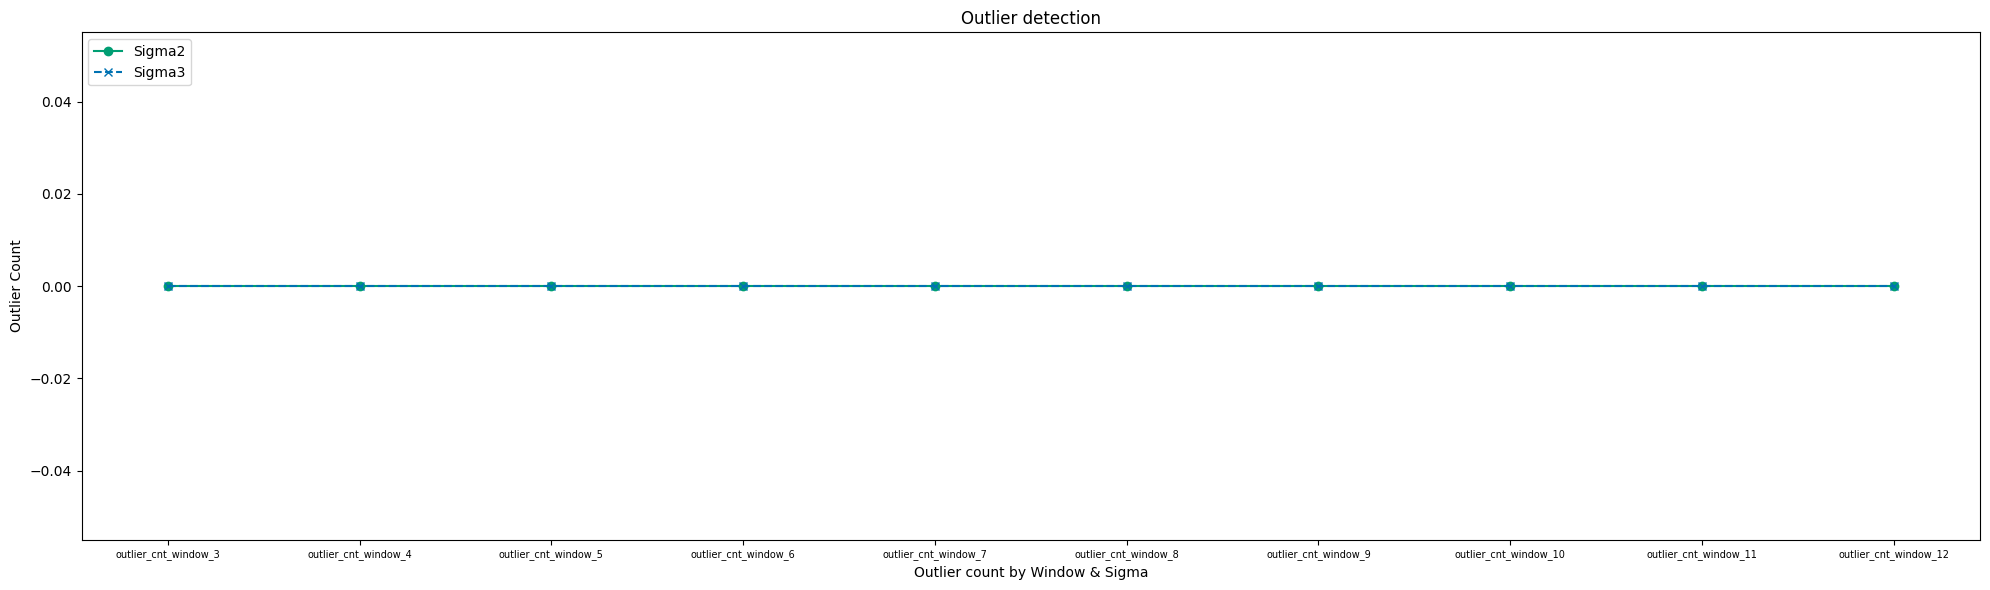

In [37]:
# errorCnt_by_window_plot(df_pivot_sample, entry)
errorCnt_by_window_plot(sample_entry)

  0%|                                                          | 0/10 [00:00<?, ?it/s]

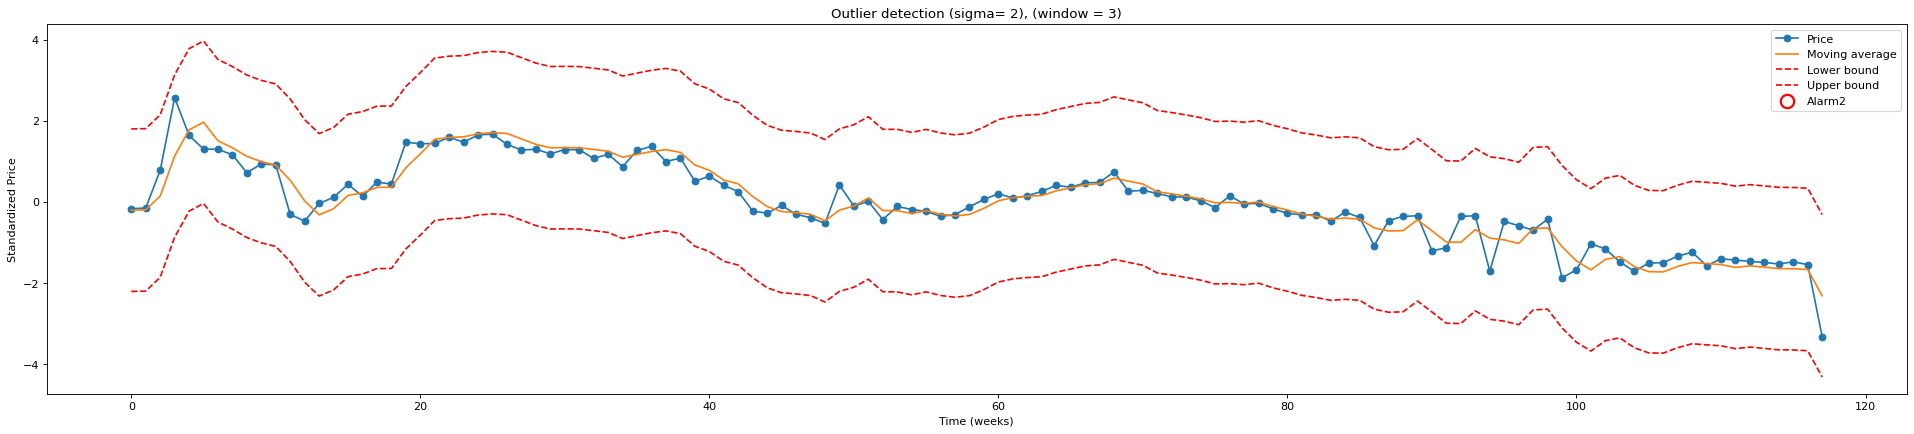

 10%|█████                                             | 1/10 [00:00<00:02,  3.81it/s]

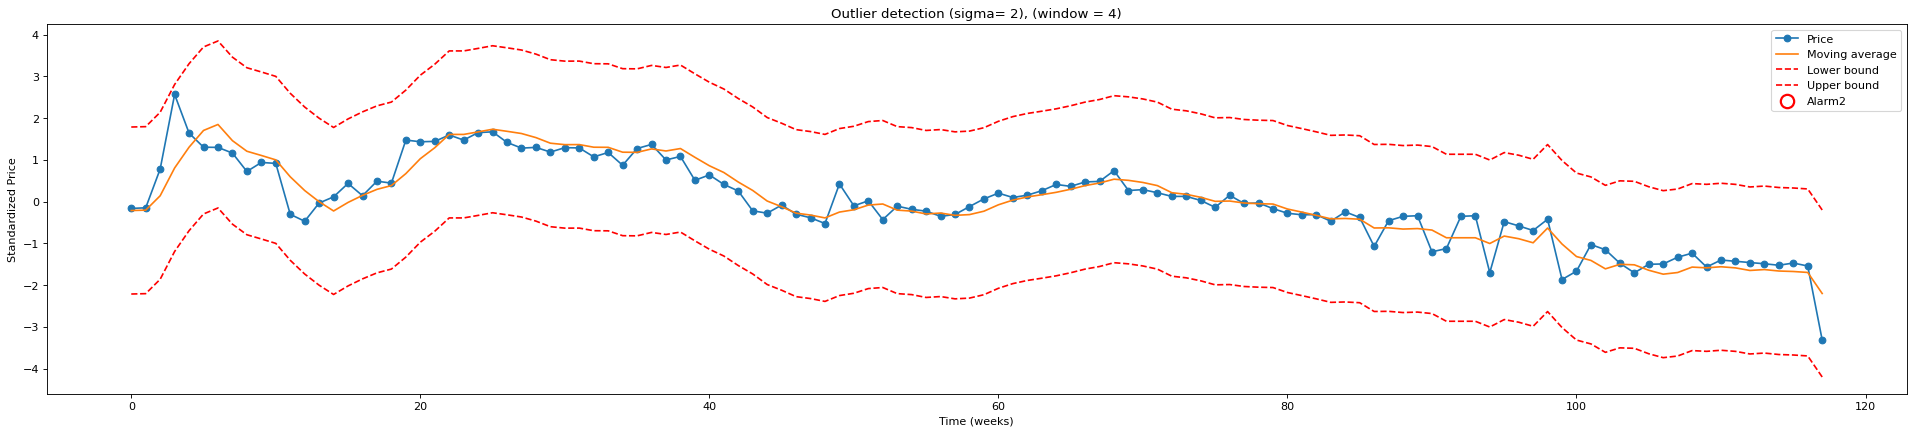

 20%|██████████                                        | 2/10 [00:00<00:02,  3.51it/s]

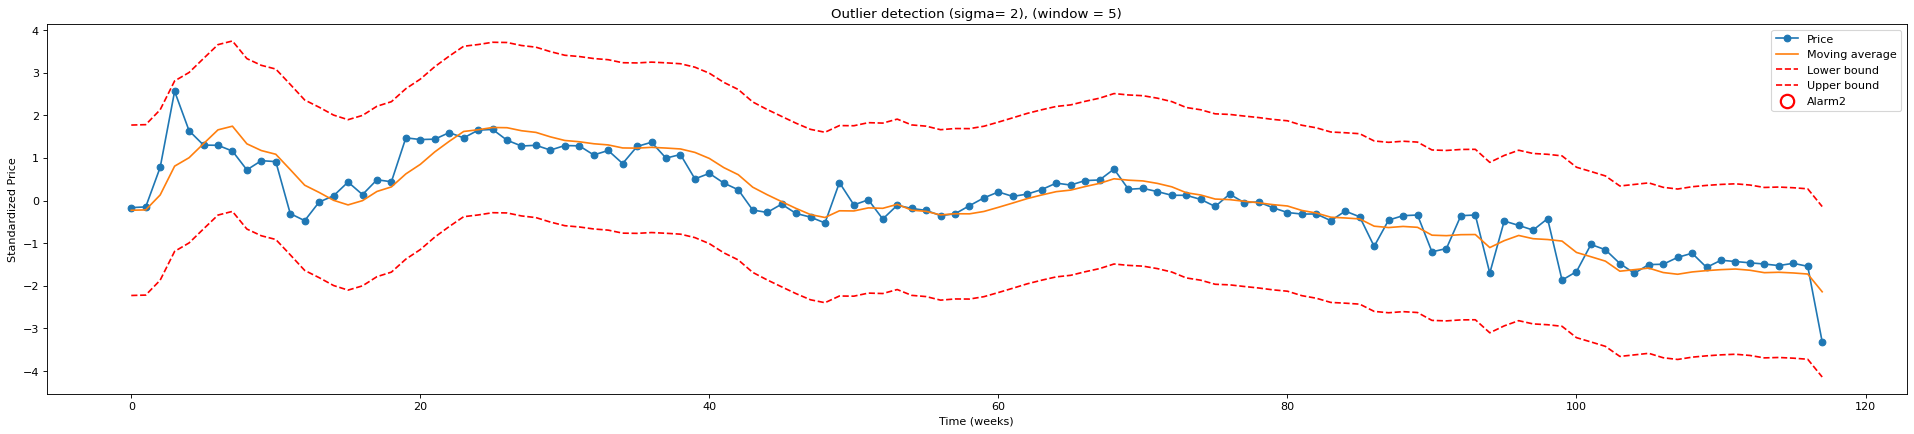

 30%|███████████████                                   | 3/10 [00:00<00:02,  2.96it/s]

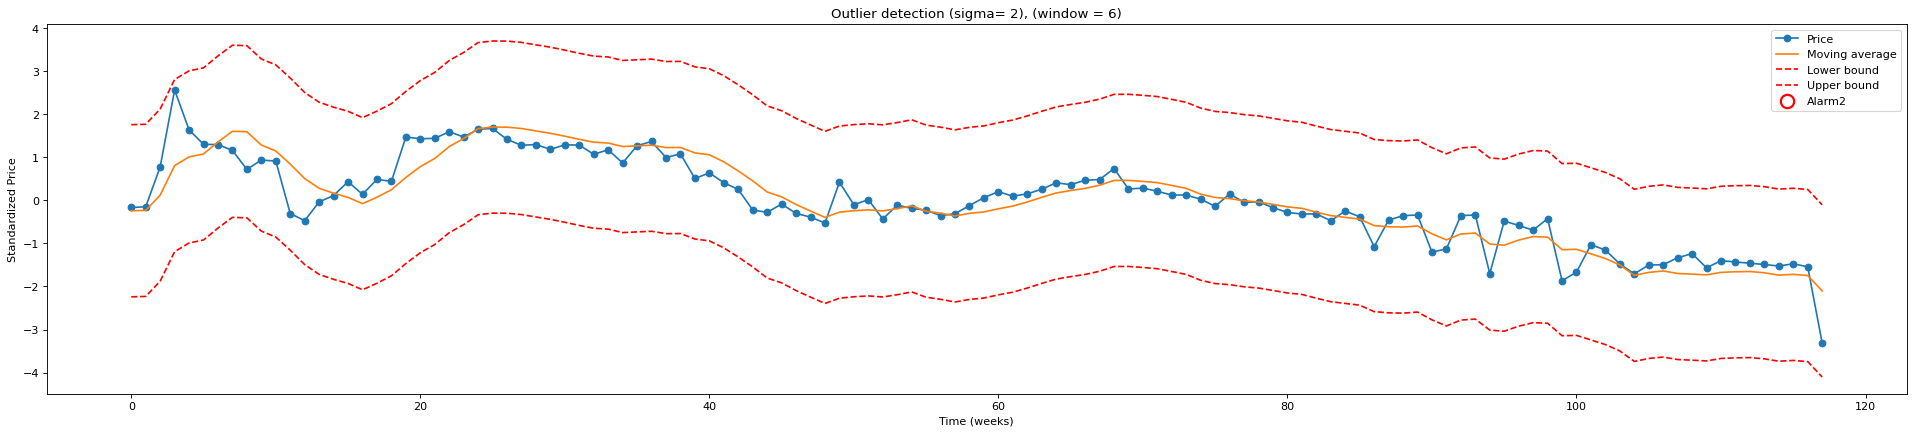

 40%|████████████████████                              | 4/10 [00:01<00:01,  3.05it/s]

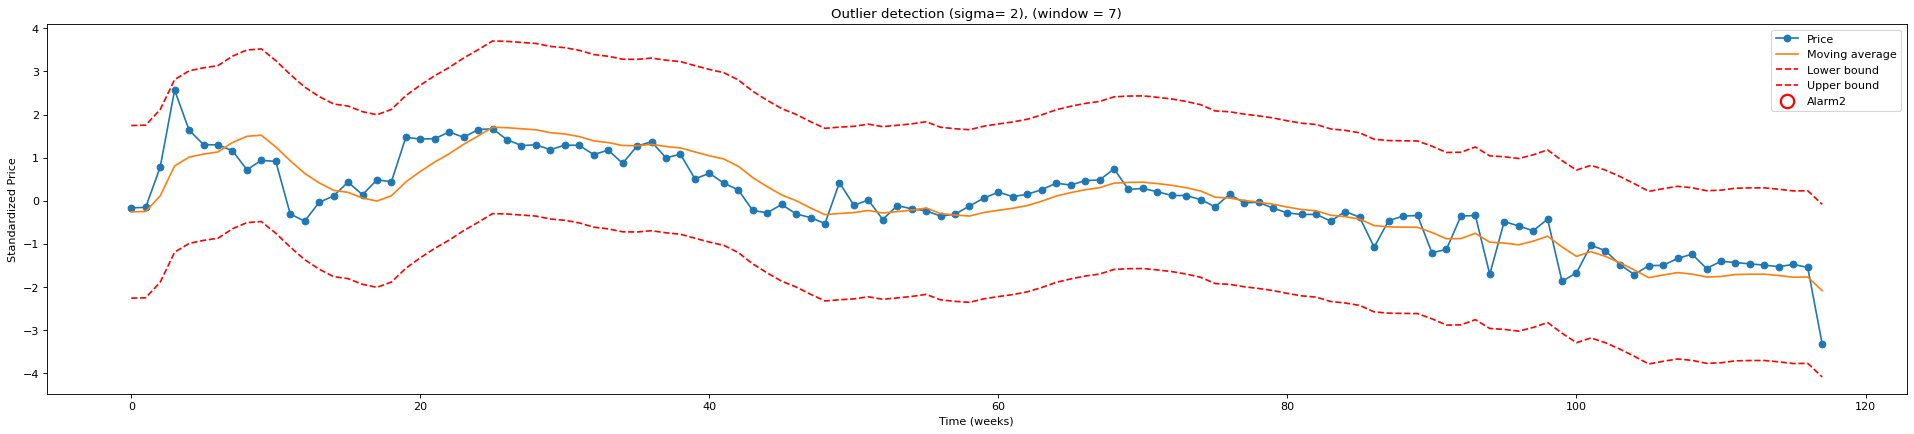

 50%|█████████████████████████                         | 5/10 [00:01<00:01,  3.11it/s]

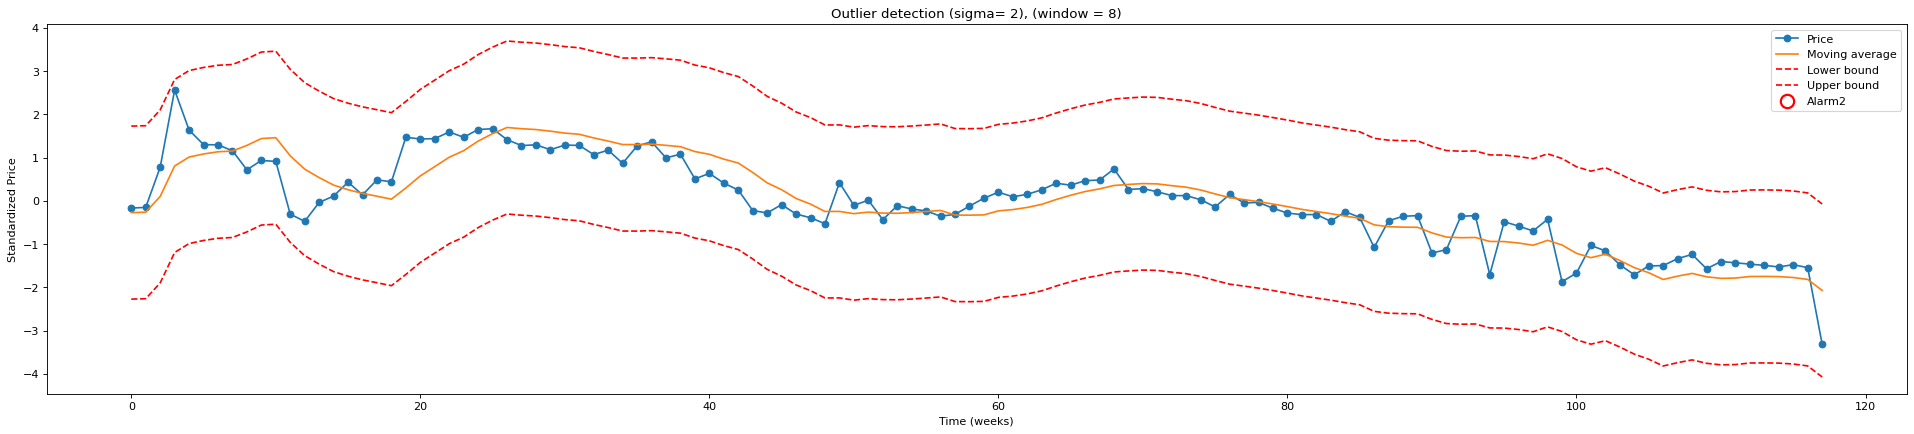

 60%|██████████████████████████████                    | 6/10 [00:01<00:01,  3.00it/s]

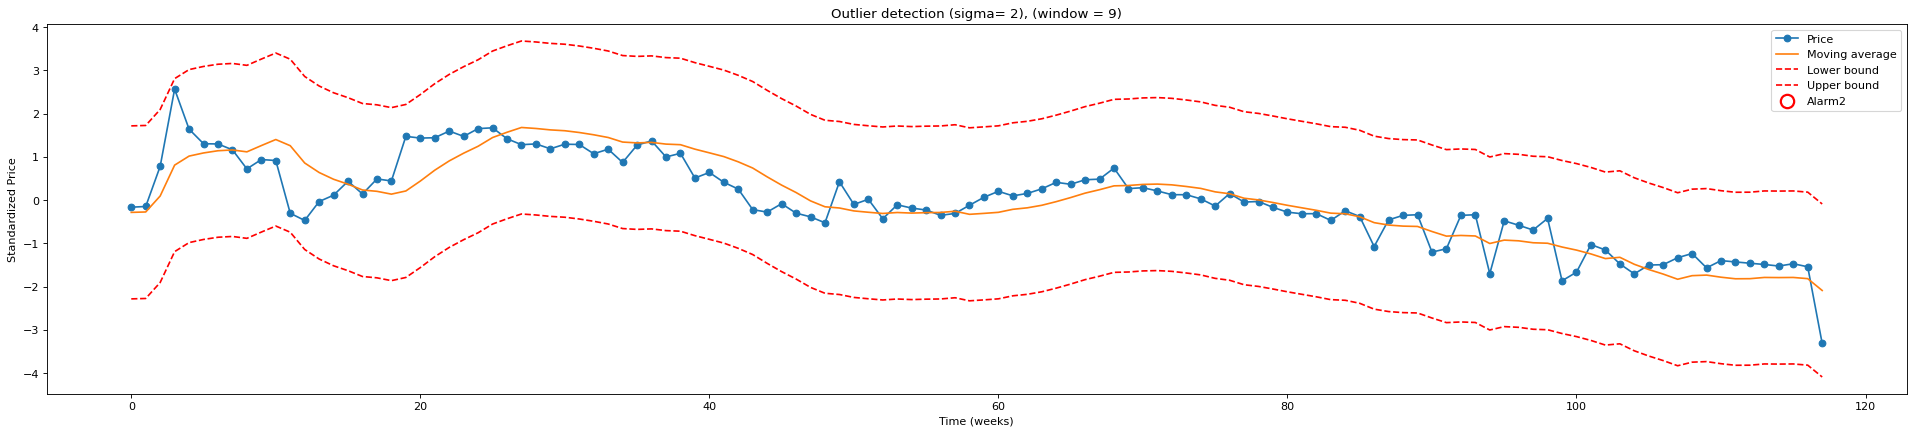

 70%|███████████████████████████████████               | 7/10 [00:02<00:00,  3.09it/s]

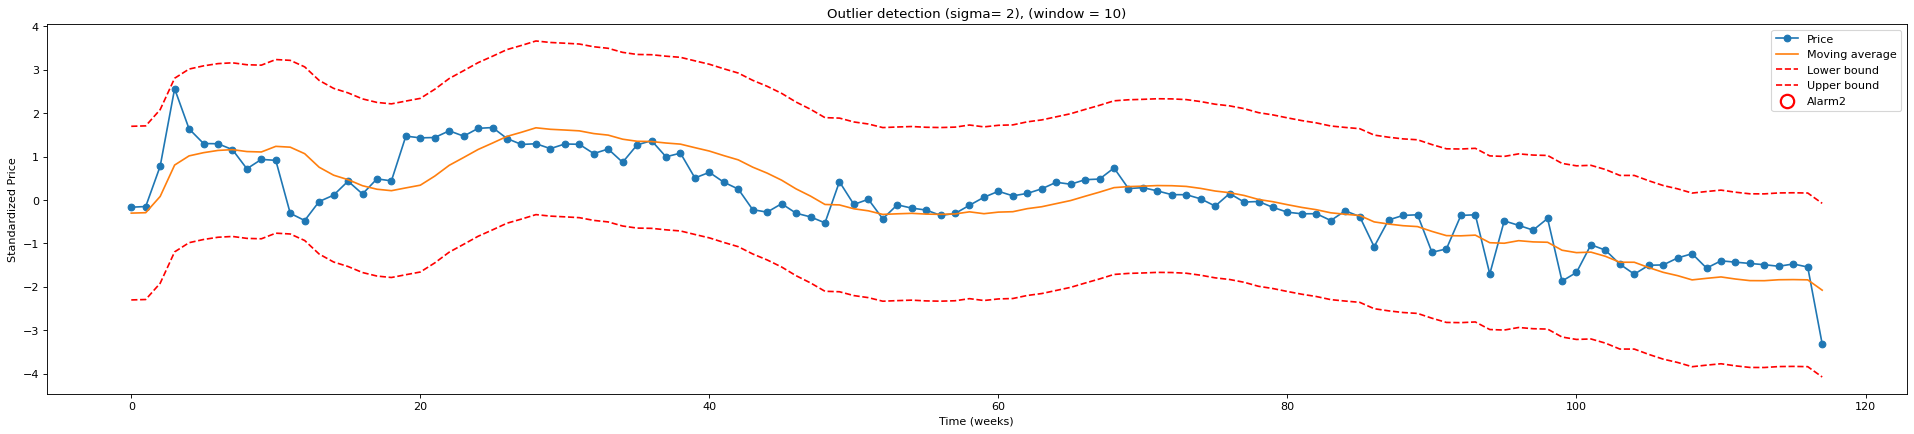

 80%|████████████████████████████████████████          | 8/10 [00:02<00:00,  3.12it/s]

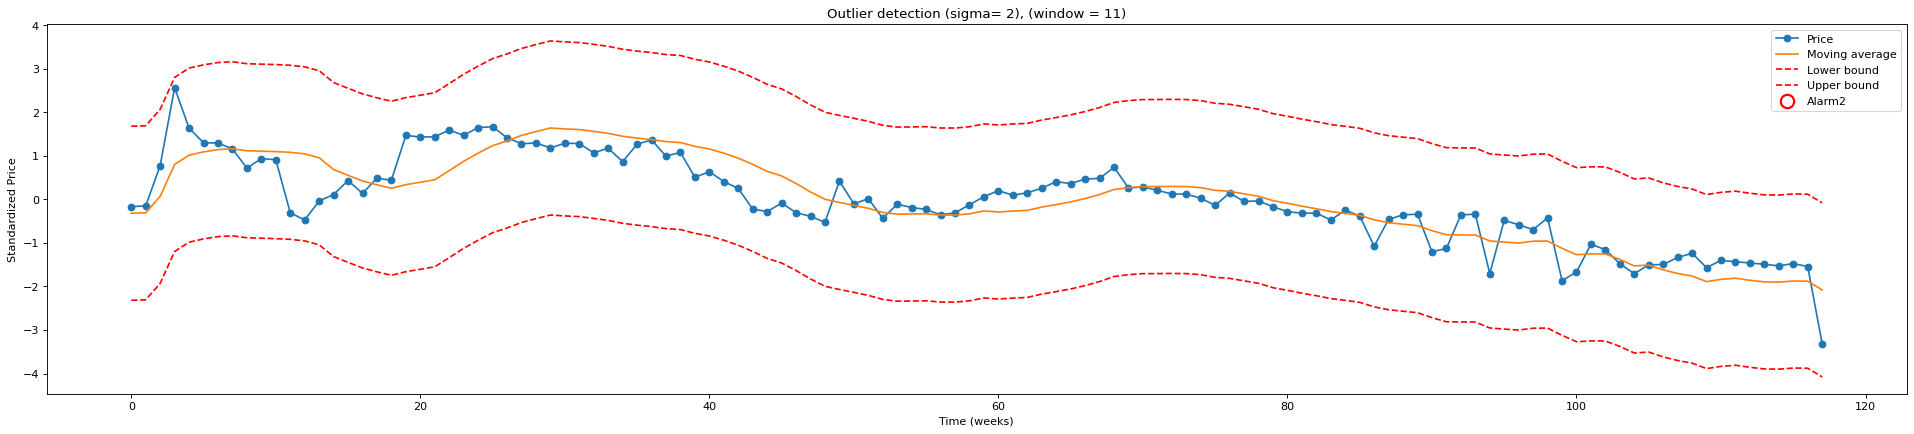

 90%|█████████████████████████████████████████████     | 9/10 [00:02<00:00,  3.24it/s]

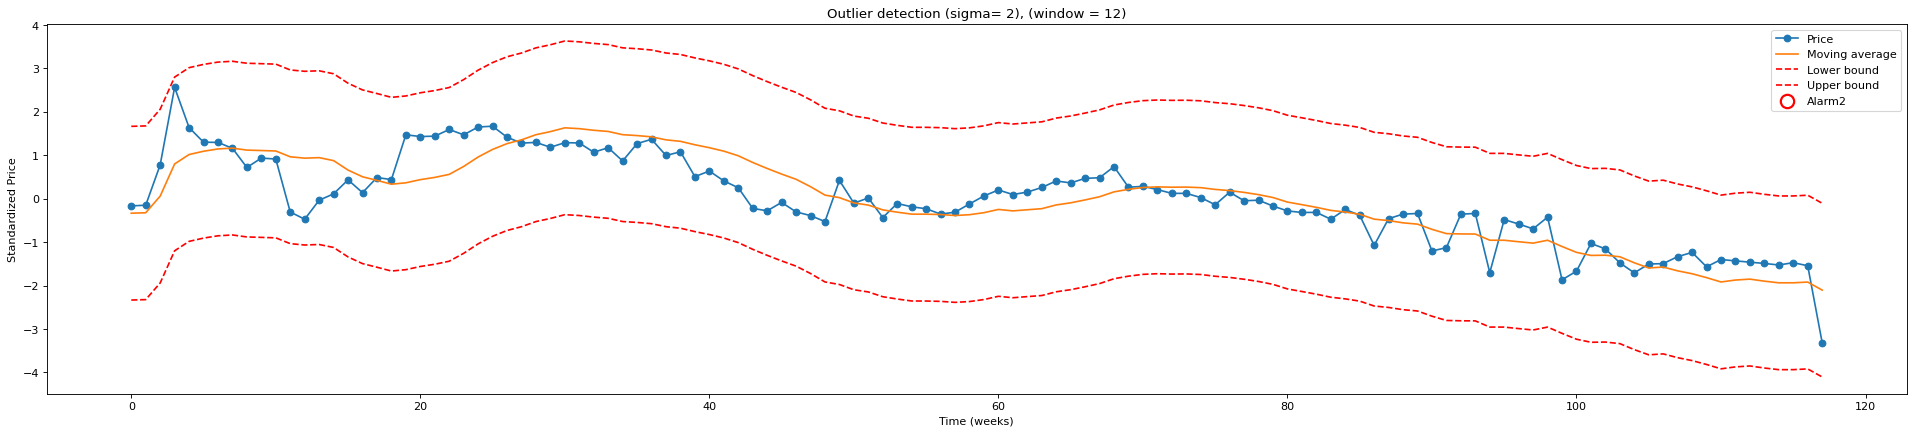

100%|█████████████████████████████████████████████████| 10/10 [00:03<00:00,  3.17it/s]


In [38]:
# Plot outlier detection according to the size of window
notNanPrice = sample_entry['price_avg'].values[~np.isnan(sample_entry['price_avg'].values)]

for window in tqdm(range(3, 13)):
    cnt = outlier_func(notNanPrice, sigma = 2, used_in_groupby=True, window = window, display_plot = True)

# Conclusion: Window = 4, sigma = 2
**Reason: Abnormal price would appear when:
1) External environment (e.g. bad weather, world war, shortage in supply)

2) Human mistake - mistakenly input the price data

Suppose that at a certain point (Tn-1), price changes with a huge rate, so the alarm occurs.
It could be the case because of the two reasons above.

Even though there could be some situations when price ups and downs frequently while drawing a huge amplitude, but those are rare. Generally, the changed price would maintain for a certain period of time (although there might be a slight change).

But, if we increase the window, then the detection bands would be too "flattend".
It will cause mainly two kind of problems as described below:
1) too flattened to detect the abnormalility.

2) detect again the next price ("Tn") and raise an alarm even it is plausible throughout the context. It is proved from the gragh above ("number of Outlier deteciton") that the number of alarms increase proportionally with size of the window.

# Compare new detection logic with as-is logic

In [13]:
new_x_idx_lst, new_outlier_lst = outlier_func(notNanPrice, window = 4, sigma = 2)

# As-is Logic VS To-be Logic - Change rate > 200 %, then raise an alarm
def as_is_alarm(row, display_plot = False, plot_together = False):
    # As-is alarm 1
    outlier_dic = {'alarm1': [], 'alarm2': []}
    
    alarm1_x_idx_lst = []
    for i in range(1, len(row)):
        chg_rate = (row[i] - row[i-1]) / row[i-1]
        if chg_rate > 2:
            alarm1_x_idx_lst.append(i)
            outlier_dic['alarm1'].append(row[i])  

    # As-is alarm 2
    average = row.mean()
    threshold_min = average - 2 * np.std(row)
    threshold_max = average + 2 * np.std(row)
    if threshold_min < 0:
        threshold_min = 0
    
    alarm2_x_idx_lst = []
    for idx, point in enumerate(row, start = 0):
        if point < threshold_min or point > threshold_max:
            alarm2_x_idx_lst.append(idx)
            outlier_dic['alarm2'].append(point)
    
    if display_plot is True:
        plt.figure(figsize = (20, 5))
        
        plt.plot(row, marker= 'o')
        plt.plot([0, len(row)], [average, average], '-')
        plt.plot([0, len(row)], [threshold_min, threshold_min], '--', color='#ff0000')
        plt.plot([0, len(row)], [threshold_max, threshold_max], '--', color='#ff0000')
        plt.plot(alarm1_x_idx_lst, outlier_dic['alarm1'], 'o'
                 , markersize = 12, markerfacecolor = 'None', markeredgecolor = 'red', markeredgewidth = 2 )
        plt.plot(alarm2_x_idx_lst, outlier_dic['alarm2'], 'o'
                 , markersize = 12, markerfacecolor = 'None', markeredgecolor = 'green', markeredgewidth = 2 )       
        
        if plot_together is True:
            plt.plot(new_x_idx_lst, new_outlier_lst, 'o'
                     , markersize = 20, markerfacecolor = 'None', markeredgecolor = 'black', markeredgewidth = 2 )
            
        plt.xlabel('Time (weeks)')
        plt.ylabel('Price')
        plt.legend(['Price', 'Average', 'Lower bound', 'Upper bound', 'As-is Alarm1', 'As-is Alarm2', 'New Alarm'], loc = 'lower right'
                  , borderpad = 0.5, labelspacing = 1)    
        plt.tight_layout()
        
        plt.show()
    
    alarm1_set = set(outlier_dic['alarm1'])
    alarm2_set = set(outlier_dic['alarm2'])
    unioned_set = alarm1_set.union(alarm2_set)
    
    return alarm1_set, alarm2_set, unioned_set

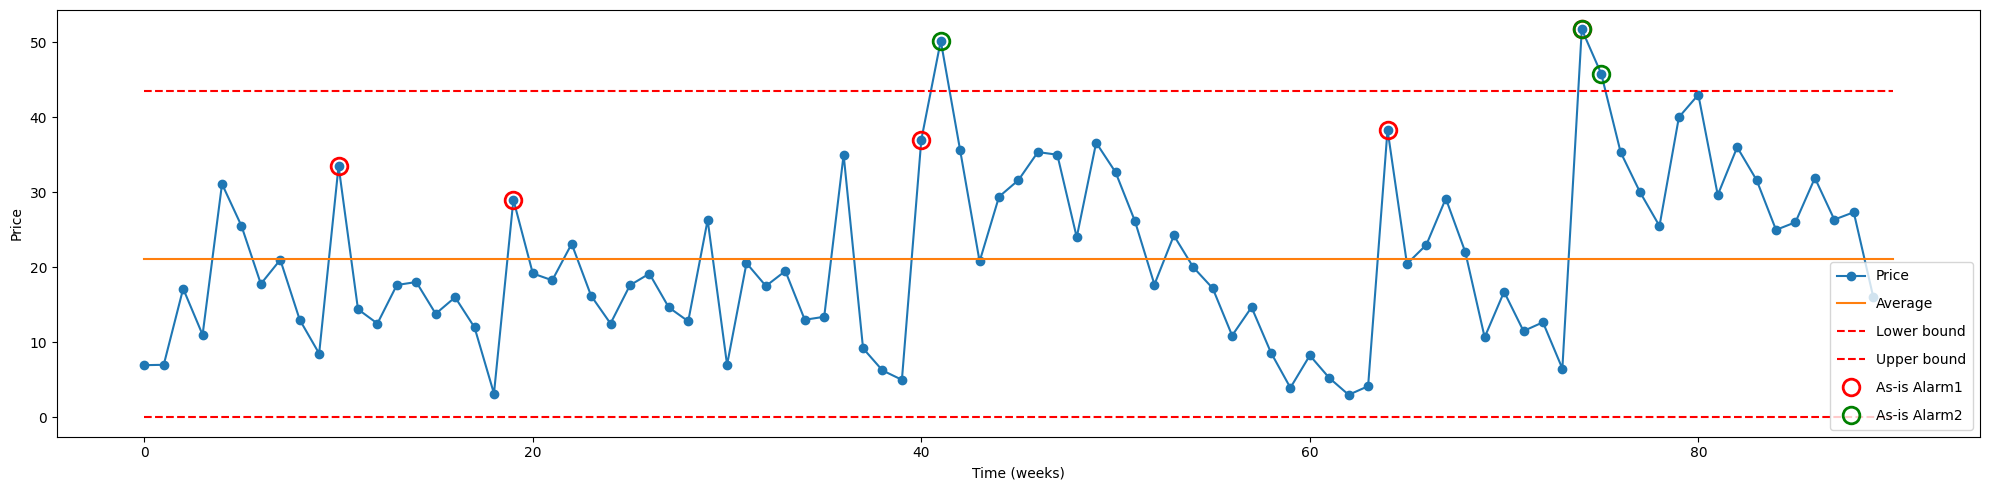

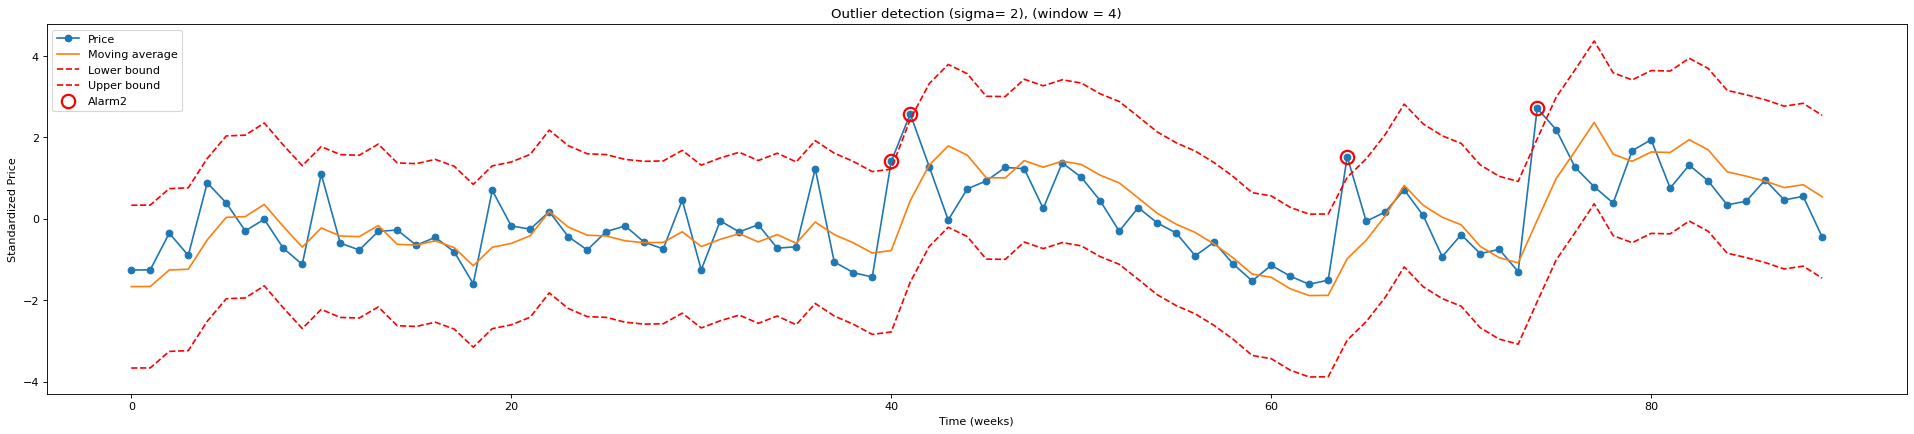

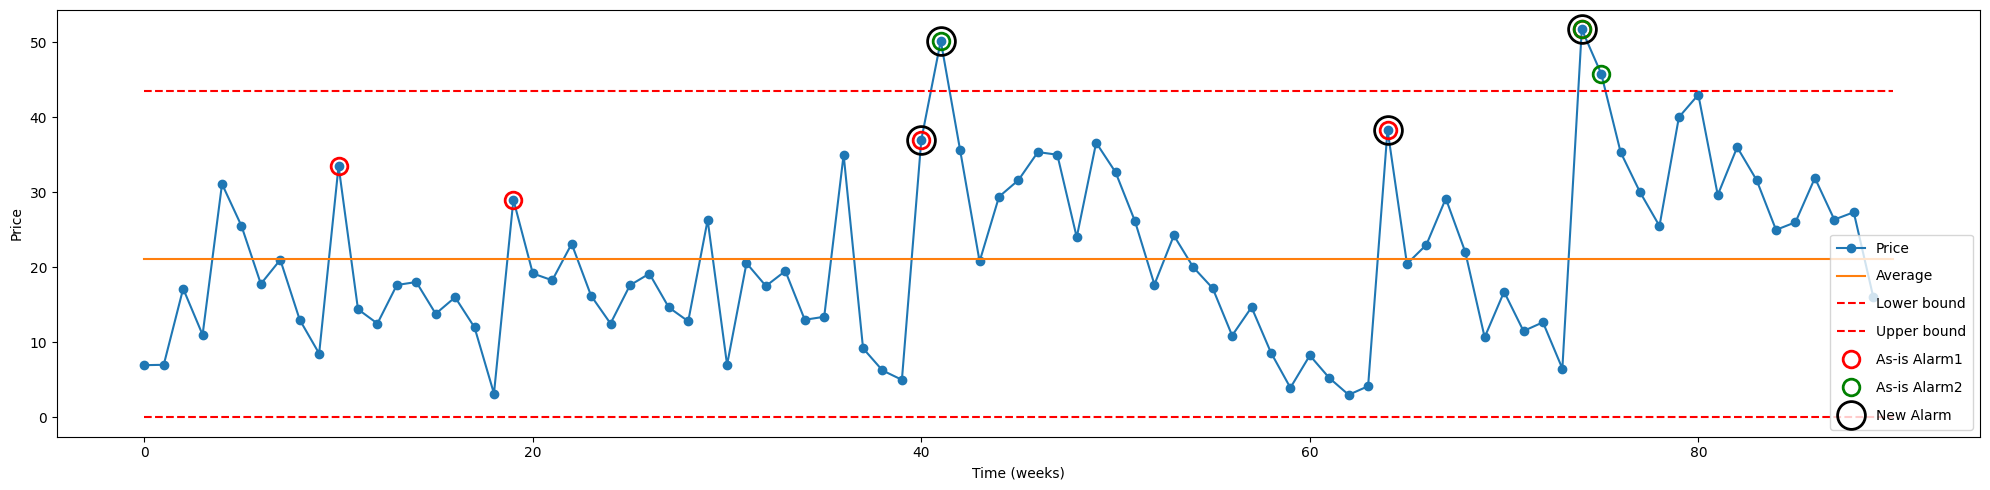

As-is alarm 1 (Alarm 1): [29.0, 33.5, 37.0, 38.3333333333, 51.7]
As-is alarm 2 (Alarm 2): [45.8, 50.175, 51.7]
As-is alarm 1, 2 union: [29.0, 33.5, 37.0, 38.3333333333, 45.8, 50.175, 51.7]

To-be alarm 1, 2 : [37.0, 38.3333333333, 50.175, 51.7]


In [14]:
# As-is Logic
alarm1_set, alarm2_set, unioned_set = as_is_alarm(notNanPrice, display_plot = True)
# To-be Logic
outlier_func(notNanPrice, window = 4, sigma = 2, display_plot=True)
# Together
as_is_alarm(notNanPrice, display_plot = True, plot_together = True)
print(f'As-is alarm 1 (Alarm 1): {sorted(alarm1_set)}')
print(f'As-is alarm 2 (Alarm 2): {sorted(alarm2_set)}')
print(f'As-is alarm 1, 2 union: {sorted(unioned_set)}')
print()
print(f'To-be alarm 1, 2 : {sorted(new_outlier_lst)}' )

In [15]:
# # Count number of outliers in whole data
# def errorCnt_by_window4(df, sigma = 2):
#     # window from 3 to 12 - Count number of outliers
#     notNanPrice = df.values[~np.isnan(df.values)]
#     # sigma = sigma
#     df[f'outlier_cnt_window_4', f'sigma{sigma}'] = df.progress_apply(lambda row: outlier_func(notNanPrice, used_in_groupby=True, sigma = sigma, window = 4), axis = 1)
#     return df

# errorCnt_by_window4(df_pivot)